In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#loading and analyzing dataset
data=pd.read_csv("https://raw.githubusercontent.com/Shreya-P7/set/main/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = data
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Converting Categorical Values into Numeric Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['median_house_value'].value_counts
data['median_house_value'] = le.fit_transform(data['median_house_value'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()

df=oe.fit_transform(data['ocean_proximity'].values.reshape(-1,1)).toarray()
df_new = pd.DataFrame(df,columns=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])

In [ ]:
#chechking numerical columns
n_clmns = [c for c in data.columns if data[c].dtype != np.dtype('O')]
n_clmns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
n_clmns.remove('longitude')
n_clmns.remove('latitude')

In [ ]:
data_new = data[n_clmns]
data_new

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,3665
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3074
2,52.0,1467.0,190.0,496.0,177.0,7.2574,3017
3,52.0,1274.0,235.0,558.0,219.0,5.6431,2917
4,52.0,1627.0,280.0,565.0,259.0,3.8462,2925
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,366
20636,18.0,697.0,150.0,356.0,114.0,2.5568,356
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,508
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,432


Scaling dataset using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')
data_new.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [ ]:
data_new.dropna(axis = 1 , inplace = True)
normalized_data = normalize.fit_transform(data_new)
pd.DataFrame(normalized_data , columns = data_new.columns)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.954179
1,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.800312
2,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.785473
3,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.759438
4,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.761520
...,...,...,...,...,...,...,...
20635,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.095288
20636,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.092684
20637,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.132257
20638,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.112471


Checking skeweness of the dataset

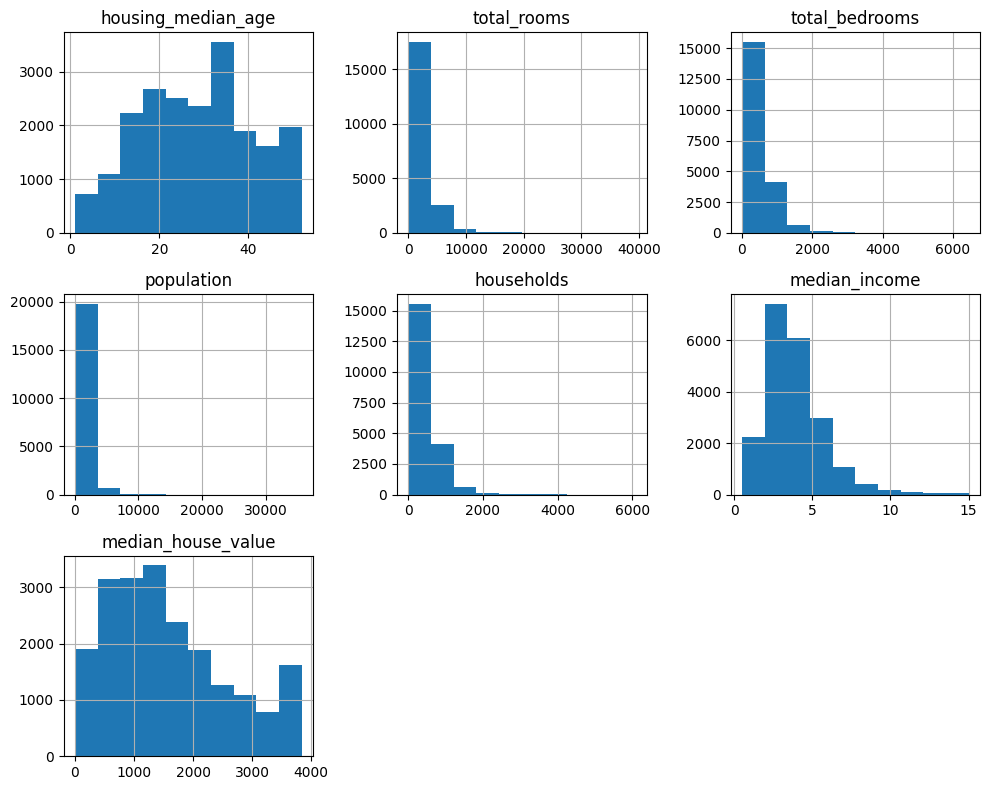

In [ ]:
data_new.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
skewness = data_new.skew()
print(skewness)

housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.661797
dtype: float64


Applying various transformation to reduce the skeweness of the dataset

In [ ]:
#created 3 copies of the dataset 
df1=data_new
df2=data_new
df3=data_new

In [ ]:
#applying Log transformation

skewed_columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
for column in skewed_columns:
    df1[column] = np.log1p(df1[column])

In [ ]:
normalized_skewness = df1.skew()
print(normalized_skewness)

housing_median_age    0.060331
total_rooms          -1.075533
total_bedrooms       -1.005686
population           -1.044087
households           -1.051607
median_income         1.646657
median_house_value    0.661797
dtype: float64


In [ ]:
#applying Square root transformation
skewed_columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
for column in skewed_columns:
    df2[column] = np.sqrt(df2[column])


In [ ]:
normalized_skewness = df2.skew()
print(normalized_skewness)

housing_median_age    0.060331
total_rooms          -1.676127
total_bedrooms       -1.753106
population           -1.619058
households           -1.762965
median_income         1.646657
median_house_value    0.661797
dtype: float64


In [ ]:
#applyting Box-Cox transformation
from scipy import stats

skewed_columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
for column in skewed_columns:
    transformed, _ = stats.boxcox(df3[column])
    df3[column] = transformed


In [ ]:
normalized_skewness = df3.skew()
print(normalized_skewness)

housing_median_age    0.060331
total_rooms           0.165609
total_bedrooms        0.155404
population            0.146461
households            0.147336
median_income         1.646657
median_house_value    0.661797
dtype: float64


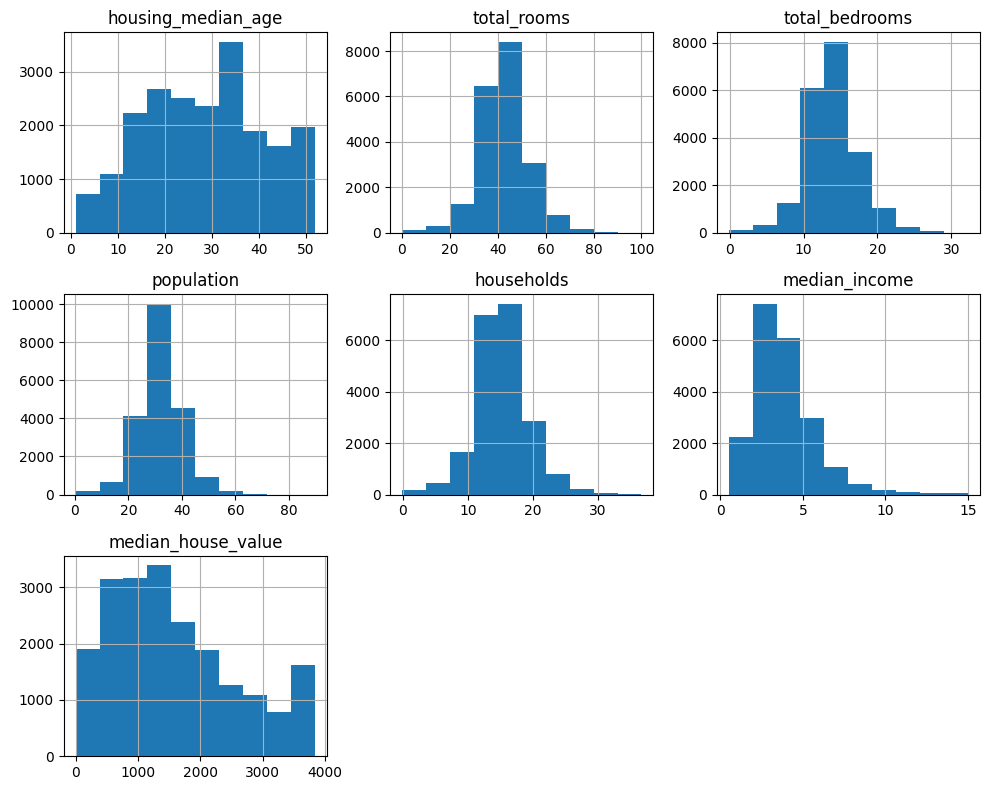

In [ ]:
#histplot to visualize the distribution
df3.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()